In [1]:
import numpy as np
import pandas as pd

# Handling Missing Values

## Delete Row

In [14]:
df1 = pd.read_csv('data/diabetes_null.csv')
print ("Dimensiones", df1.shape)
print ("valores nulos por variable")
print df1.isnull().sum().sort_values(ascending=False)
df_no_missing = df1.dropna(axis=0)
print ("Nuevas dimensiones",df_no_missing.shape)

('Dimensiones', (768, 9))
valores nulos por variable
Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64
('Nuevas dimensiones', (392, 9))


## Fill with mean

In [25]:
from sklearn.preprocessing import Imputer

# Data from excel
df1 = pd.read_csv('data/diabetes_null.csv')

#Imputer to replace Null with mean
imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
imp.fit(df1)
df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)

#print
print ("valores nulos por variable")
print df1.isnull().sum().sort_values(ascending=False)
print (df1.shape)

valores nulos por variable
Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64
(768, 9)


## Fill with median
#### Do yourself!!!

# Handling Noicy Data

## Function to find outliers

In [26]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values


## Outliers Found in each column

In [47]:
glucose_indices, glucose_values = find_outliers_tukey(df1['Glucose'])
print("Outliers for Glucose")
print(np.sort(glucose_values))

print("Outliers for Pregnancies")
pr_indices, pr_values = find_outliers_tukey(df1['Pregnancies'])
print(np.sort(pr_values))

print("Outliers for BloodPressure")
#TODO


print("Outliers for SkinThickness")
#TODO

print("Outliers for Insulin")
#TODO

print("Outliers for BMI")
#TODO

print("Outliers for DiabetesPedigreeFunction")
#TODO

print("Outliers for Age")
#TODO


Outliers for Glucose
[]
Outliers for Pregnancies
[14. 14. 15. 17.]
Outliers for BloodPressure
Outliers for SkinThickness
Outliers for Insulin
Outliers for BMI
Outliers for DiabetesPedigreeFunction
Outliers for Age


## Deleting Row

In [32]:
print (df1.shape)
df_del = df1.drop(pr_indices)
print(df_del.head(5))
print (df_del.shape)

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  105.659898  33.6   
1          1.0     85.0           66.0      29.000000  105.659898  26.6   
2          8.0    183.0           64.0      25.876155  105.659898  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0            4.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  
(764, 9)


## Replace with min or max

In [46]:
min_in = np.min(df_del['Insulin'])
print (min_in)
print (df_del['Insulin'].mean())
df_del['Insulin'] = np.where(df_del['Insulin'] > 168, min_in, df_del['Insulin'])
print(df_del.head(10))
print (df_del['Insulin'].mean())



1.0
76.881076089
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0          6.0    148.0      72.000000      35.000000  105.659898  33.600000   
1          1.0     85.0      66.000000      29.000000  105.659898  26.600000   
2          8.0    183.0      64.000000      25.876155  105.659898  23.300000   
3          1.0     89.0      66.000000      23.000000   94.000000  28.100000   
4          0.0    137.0       4.000000      35.000000  168.000000  43.100000   
5          5.0    116.0      74.000000      25.876155  105.659898  25.600000   
6          3.0     78.0       5.000000      32.000000   88.000000  31.000000   
7         10.0    115.0      55.706685      25.876155  105.659898  35.300000   
8          2.0    197.0       7.000000      45.000000    1.000000   3.500000   
9          8.0    125.0      96.000000      25.876155  105.659898  29.865654   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1           

#### Do yourself!! Replace with max where BloodPressure > 96

## Normalization and Reduction

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_del)

PCA(copy=True, n_components=2, whiten=False)

df = pca.transform(df_del)

df_2d = pd.DataFrame(df)

df_2d.index = df_del.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head(5)



,PC1,PC2
0,43.598578,35.733940
1,-18.480752,26.363145
2,78.091507,41.876734
3,-13.010595,15.209557
4,23.073140,94.817745


# Visualization

## Histogram

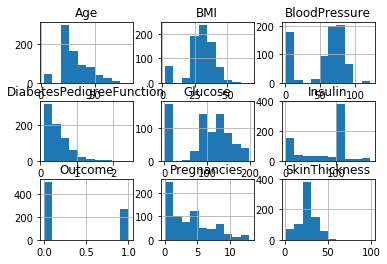

In [44]:
import matplotlib.pyplot as plt
df_del.hist()
plt.show()

## Density Plot

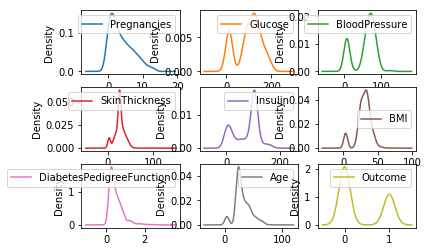

In [45]:
df_del.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

## Box Plot

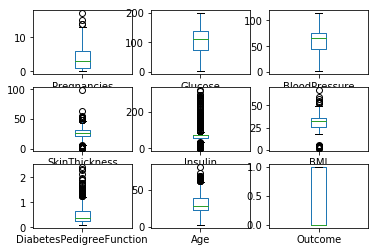

In [53]:
df_del.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()


## Correlation Matrix

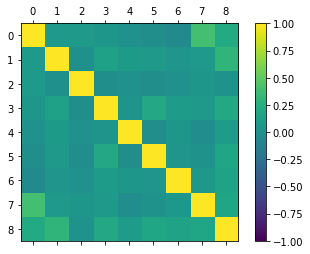

In [54]:
#Correlatión de Pearson
cor = df_del.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

## Scatter Plot

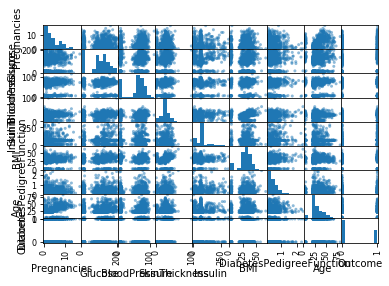

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_del)
plt.show()